In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # import the curve fitting function
from scipy.special import factorial
%matplotlib inline

In [72]:
def chi2(ymeasured,ytheory):
    # N = number of bins
    # ymeasured = Array of the measured number of counts in each bin
    # ytheory = Array of the predicted number of counts in each bin
    
    N = len(ymeasured)
    sigma = np.sqrt(ymeasured)
    for i in np.arange(0,N):
        if sigma[i] == 0:
            sigma[i] = 1
    
    
    
    return (1/N)*np.sum(np.array([((ymeasured[i]-ytheory[i])/sigma[i])**2 for i in np.arange(0,N)]))

# Constant Intensity

Variables are poorly named and multiply used.

In [73]:
def Poisson(n,nav):
    return (nav**n)*((factorial(n, exact=False))**(-1))*np.exp(-nav)

### Rate 1000

In [74]:
ThermR1000 = np.loadtxt('ConstantIntensity_Rate1000.csv',delimiter = ',');

In [75]:
np.max(ThermR1000)

7.0

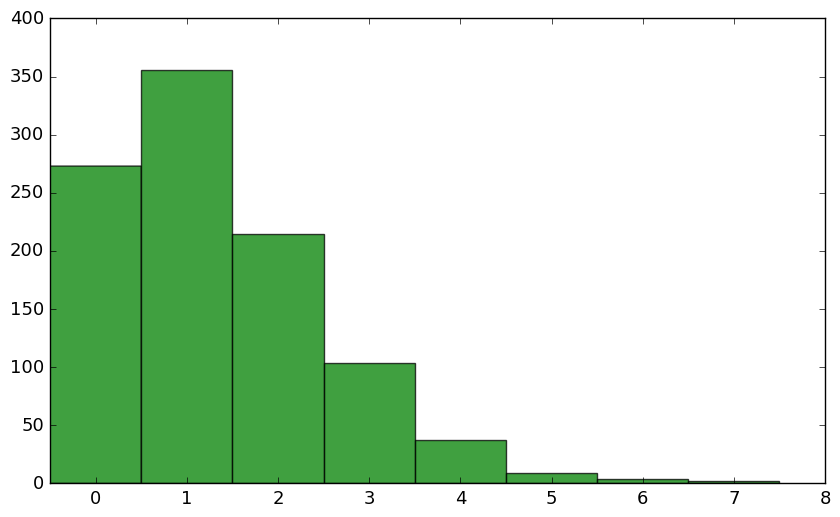

In [76]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

no, binso, patcheso = plt.hist(ThermR1000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR1000)+1);

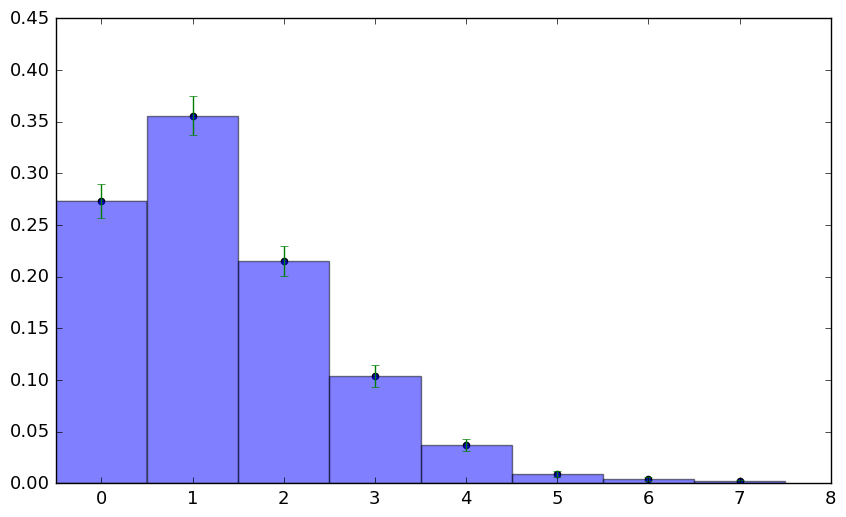

In [77]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR1000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

This data was collected in a time window of 1 ms. Need average number of photons counted in 1ms to continue.

In [78]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R1000 = np.sum(n*np.arange(0,np.max(ThermR1000)+1))
n_av_CI_R1000

1.329

In [79]:
CHI_CIR1000 = chi2(no,Poisson(np.arange(0,np.max(ThermR1000)+1),n_av_CI_R1000)*1000)
CHI_CIR1000

0.55076137481786358

In [80]:
CHI_CIR1000/8

0.068845171852232948

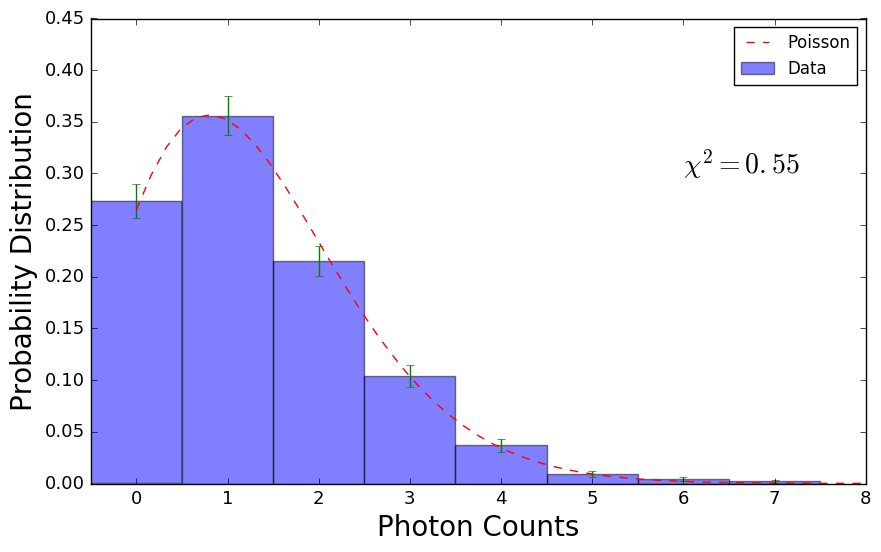

In [81]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');

plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')

plt.plot(np.linspace(0,np.max(ThermR1000)+1), Poisson(np.linspace(0,np.max(ThermR1000)+1),n_av_CI_R1000), 'r--', linewidth=1,label='Poisson')
plt.legend(loc='best')


plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

plt.text(6,0.3,'$\chi^2 = %.2f$ ' % (CHI_CIR1000),size=20)

plt.xlabel('Photon Counts',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('CIR1000.png')

### Rate 3000

In [82]:
ThermR3000 = np.loadtxt('ConstantIntensity_Rate3000.csv',delimiter = ',');

In [83]:
np.max(ThermR3000)

12.0

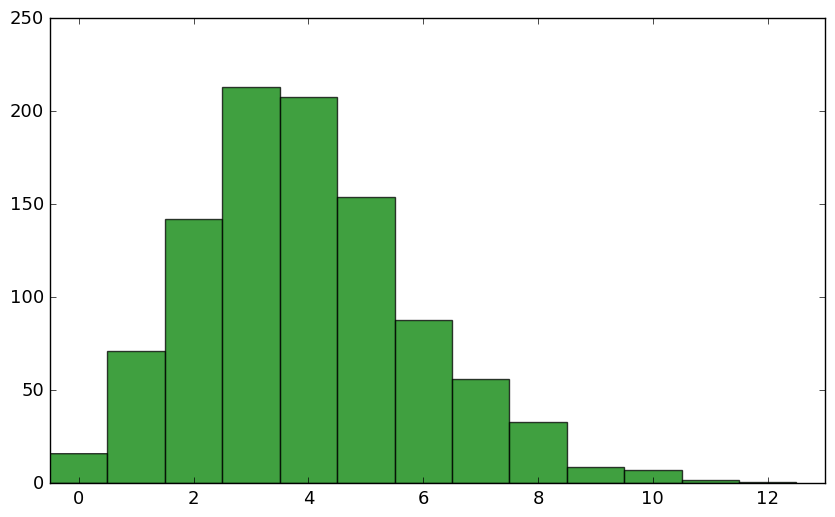

In [84]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

no, binso, patcheso = plt.hist(ThermR3000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR3000)+1);

In [85]:
len(no)

13

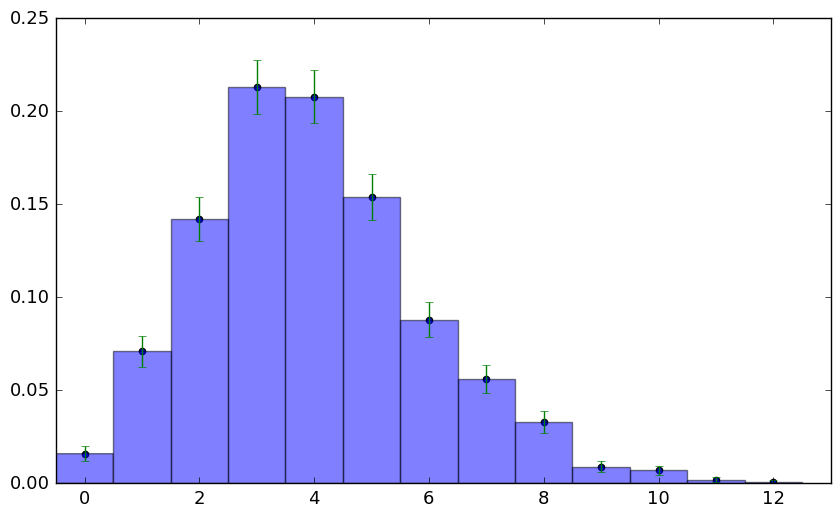

In [86]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR3000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

In [87]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R3000 = np.sum(n*np.arange(0,np.max(ThermR3000)+1))
n_av_CI_R3000

3.9649999999999999

In [88]:
CHI_CIR3000 = chi2(no,Poisson(np.arange(0,np.max(ThermR3000)+1),n_av_CI_R3000)*1000)
CHI_CIR3000

0.6398657508282598

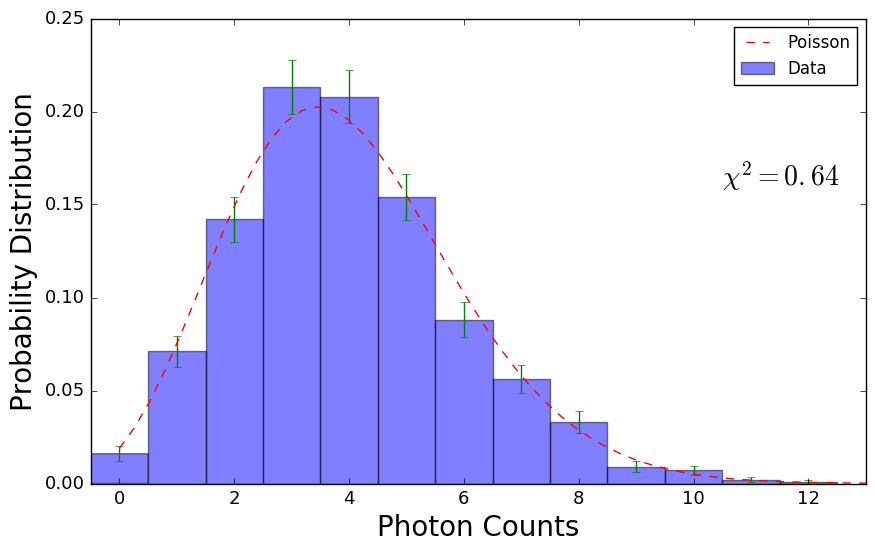

In [89]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR3000)+1), Poisson(np.linspace(0,np.max(ThermR3000)+1),n_av_CI_R3000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')
plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

plt.text(10.5,0.16,'$\chi^2 = %.2f$ ' % (CHI_CIR3000),size=20)

plt.xlabel('Photon Counts',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('CIR3000.png')

### Rate 10,000

In [90]:
ThermR10000 = np.loadtxt('ConstantIntensity_Rate10000.csv',delimiter = ',');

In [91]:
np.max(ThermR10000)

24.0

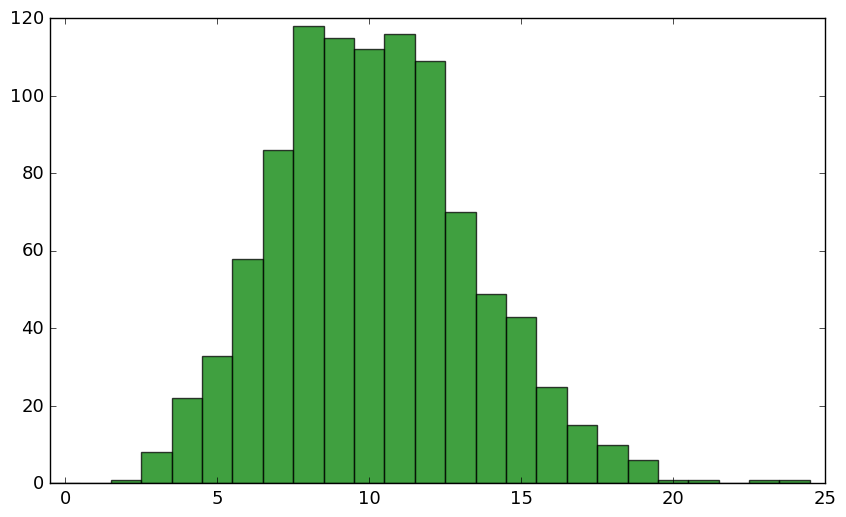

In [92]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

no, binso, patcheso = plt.hist(ThermR10000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR10000)+1);

In [94]:
len(no)

25

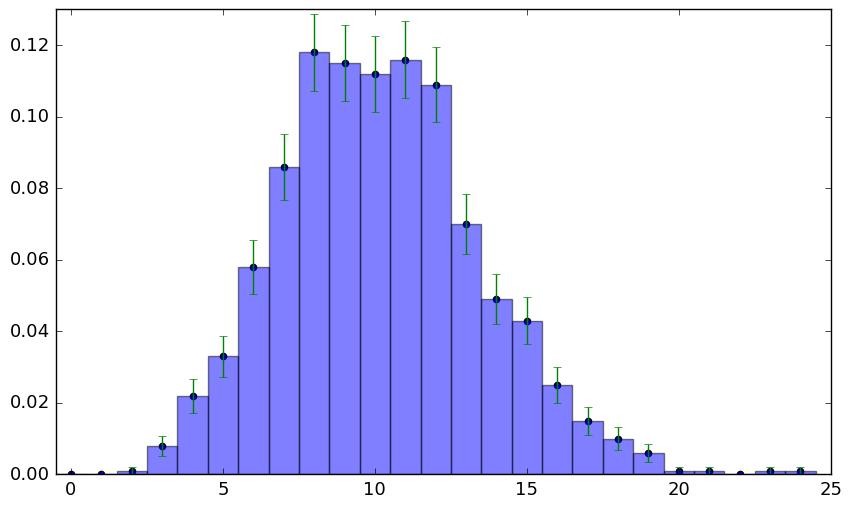

In [95]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR10000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.13);

In [96]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R10000 = np.sum(n*np.arange(0,np.max(ThermR10000)+1))
n_av_CI_R10000

10.19

In [97]:
CHI_CIR10000 = chi2(no,Poisson(np.arange(0,np.max(ThermR10000)+1),n_av_CI_R10000)*1000)
CHI_CIR10000

0.5079198794036397

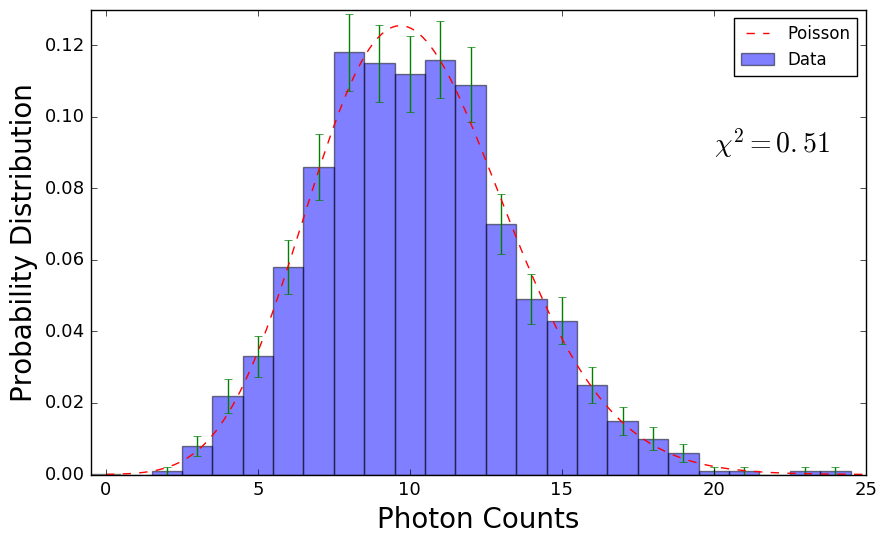

In [98]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR10000)+1,200), Poisson(np.linspace(0,np.max(ThermR10000)+1,200),n_av_CI_R10000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')
plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.13);

plt.text(20,0.09,'$\chi^2 = %.2f$ ' % (CHI_CIR10000),size=20)

plt.xlabel('Photon Counts',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('CIR10000.png')

# Psuedothermal Source

In [99]:
def BoseEin(n,nav):
    return (nav**n)/((nav + 1)**(n+1))

### Rate 1000

In [100]:
ThermR1000 = np.loadtxt('Therm_Rate1000.csv',delimiter = ',');

In [101]:
np.max(ThermR1000)

12.0

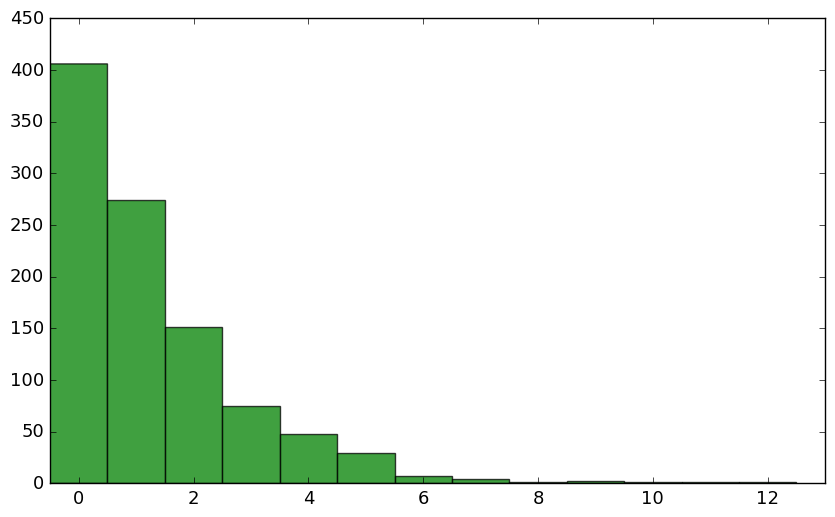

In [102]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

no, binso, patcheso = plt.hist(ThermR1000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR1000)+1);

In [103]:
len(no)

13

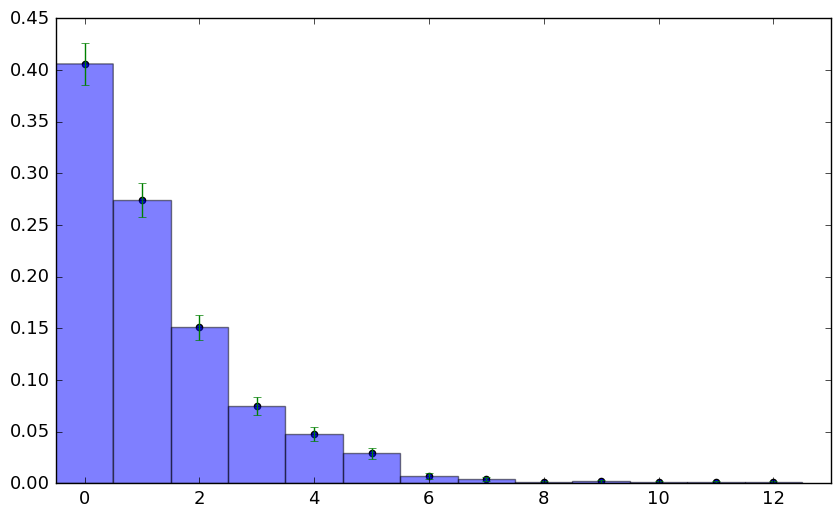

In [104]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR1000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

In [105]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R1000 = np.sum(n*np.arange(0,np.max(ThermR1000)+1))
n_av_CI_R1000

1.2669999999999999

In [106]:
CHI_ThermR1000 = chi2(no,BoseEin(np.arange(0,np.max(ThermR1000)+1),n_av_CI_R1000)*1000)
CHI_ThermR1000

2.1680114946865223

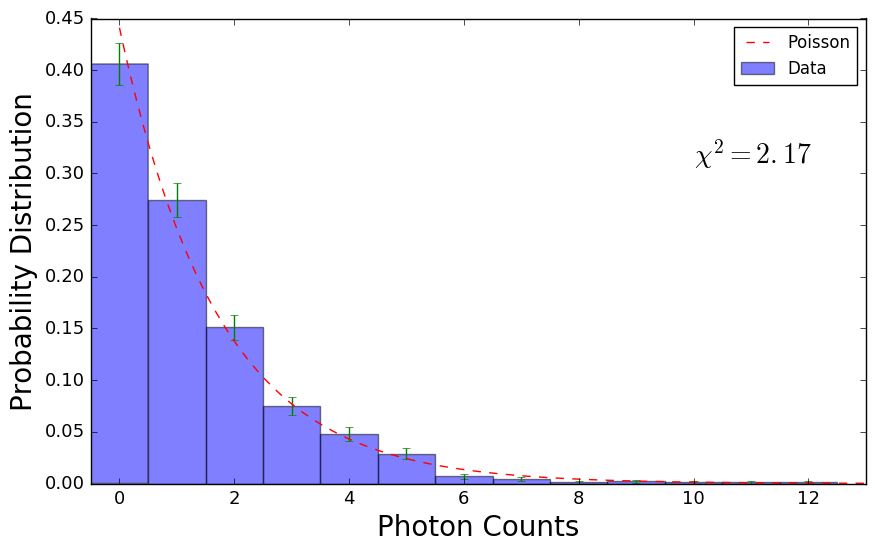

In [107]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR1000)+2)

n, bins, patches = plt.hist(ThermR1000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR1000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR1000)+1,200), BoseEin(np.linspace(0,np.max(ThermR1000)+1,200),n_av_CI_R1000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')

plt.xlim(-0.5,np.max(ThermR1000)+1);
plt.ylim(0,0.45);

plt.text(10,0.31,'$\chi^2 = %.2f$ ' % (CHI_ThermR1000),size=20)

plt.xlabel('Photon Counts',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('ThermR1000.png')

### Rate 3000

In [108]:
ThermR3000 = np.loadtxt('Therm_Rate3000.csv',delimiter = ',');

In [109]:
np.max(ThermR1000)

12.0

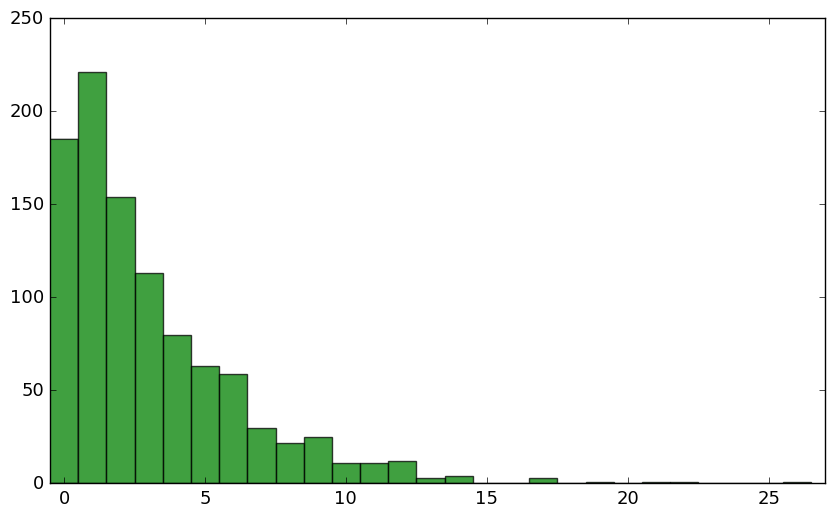

In [110]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

no, binso, patcheso = plt.hist(ThermR3000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR3000)+1);

In [111]:
len(no)

27

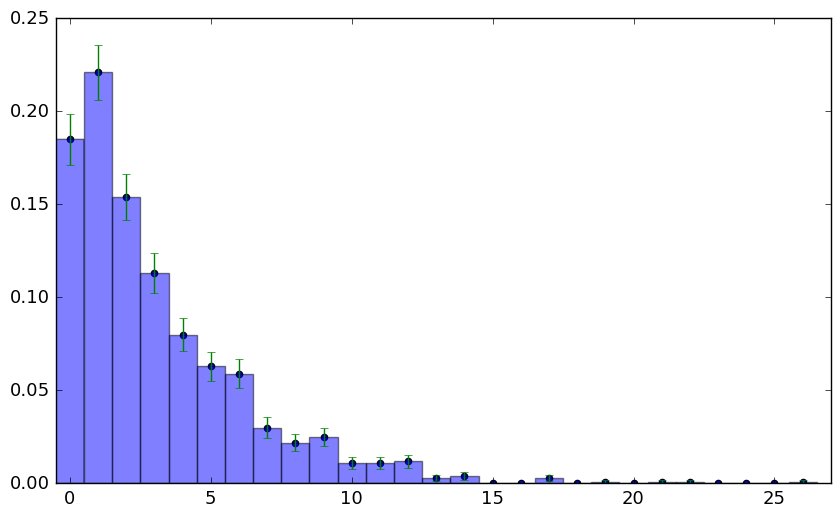

In [112]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR3000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

In [113]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R3000 = np.sum(n*np.arange(0,np.max(ThermR3000)+1))
n_av_CI_R3000

3.077

In [114]:
CHI_ThermR3000 = chi2(no,BoseEin(np.arange(0,np.max(ThermR3000)+1),n_av_CI_R3000)*1000)
CHI_ThermR3000

2.3866423125870884

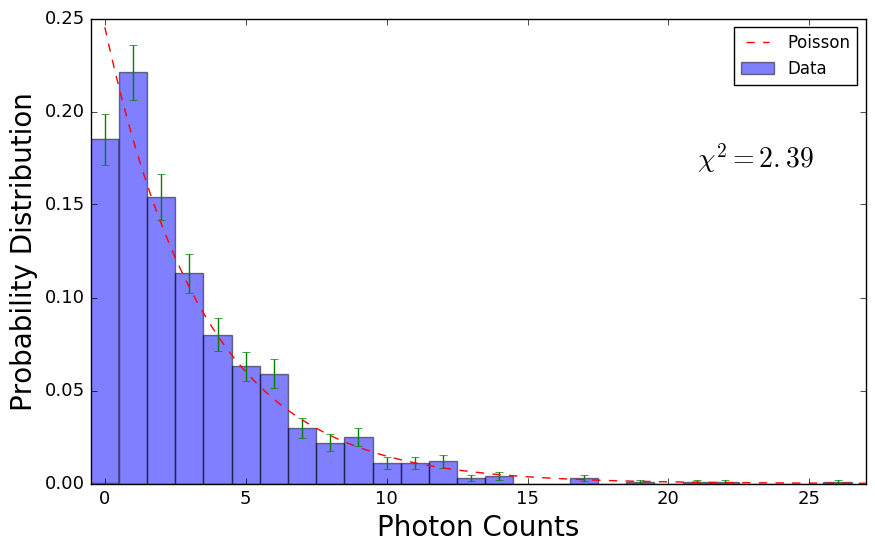

In [115]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR3000)+2)

n, bins, patches = plt.hist(ThermR3000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR3000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR3000)+1,200), BoseEin(np.linspace(0,np.max(ThermR3000)+1,200),n_av_CI_R3000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')

plt.xlim(-0.5,np.max(ThermR3000)+1);
plt.ylim(0,0.25);

plt.text(21,0.17,'$\chi^2 = %.2f$ ' % (CHI_ThermR3000),size=20)

plt.xlabel('Photon Counts',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('ThermR3000.png')

### Rate 10,000

In [116]:
ThermR10000 = np.loadtxt('Therm_Rate10000.csv',delimiter = ',');

In [117]:
np.max(ThermR10000)

96.0

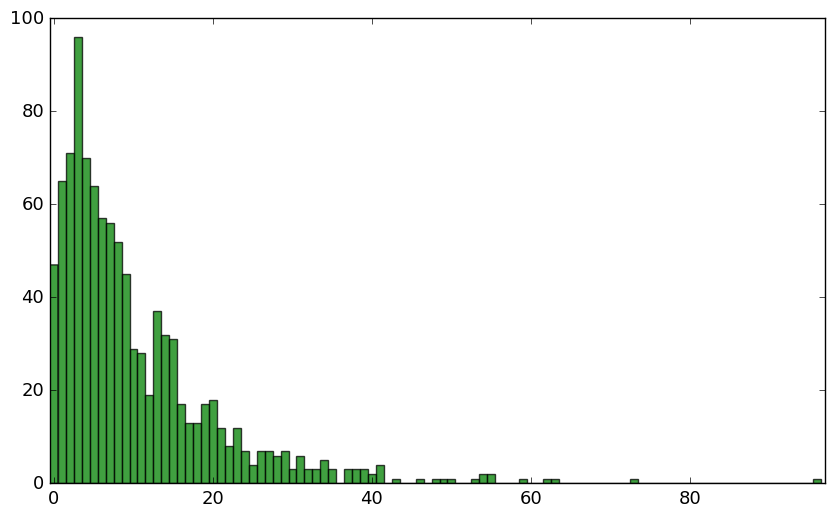

In [118]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

no, binso, patcheso = plt.hist(ThermR10000,normed = 0,align='left',bins = bins,facecolor='green', alpha=0.75);
yerr = np.sqrt(no)/np.sum(no)
plt.xlim(-0.5,np.max(ThermR10000)+1);

In [119]:
len(no)

97

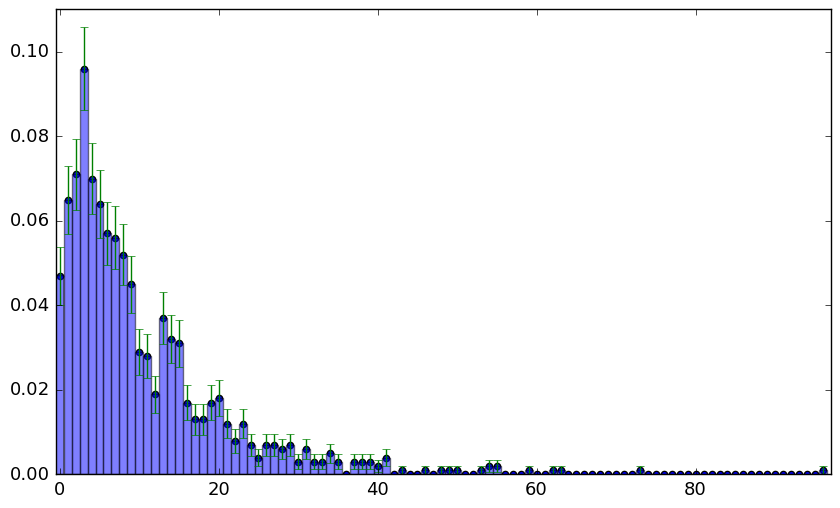

In [43]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50);

plt.scatter(np.arange(0,np.max(ThermR10000)+1), n)
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')


plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.11);

In [44]:
#n_av = 0*P(0) + 1*P(1) + ....
n_av_CI_R10000 = np.sum(n*np.arange(0,np.max(ThermR10000)+1))
n_av_CI_R10000

10.186

In [45]:
CHI_ThermR10000 = chi2(no,BoseEin(np.arange(0,np.max(ThermR10000)+1),n_av_CI_R10000)*1000)
CHI_ThermR10000

1.1986746354337972

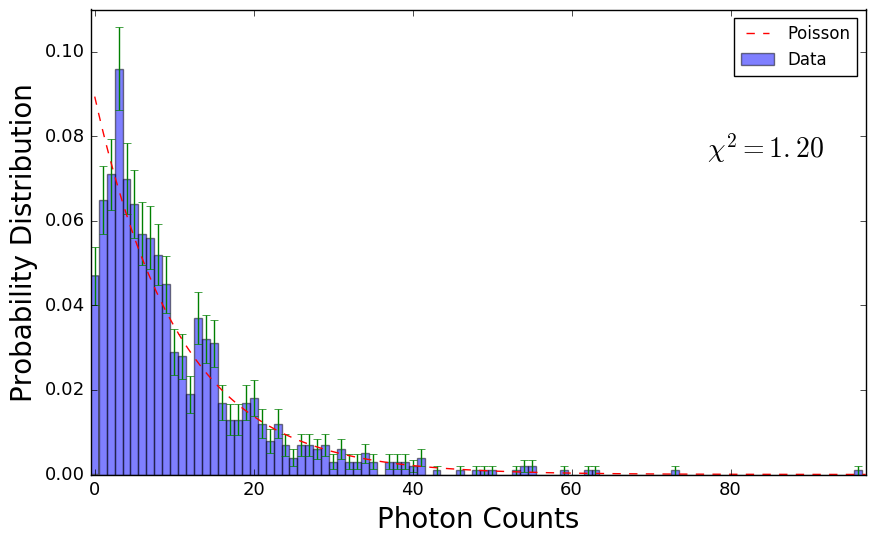

In [46]:
plt.figure(figsize=(10,6))
plt.xticks(size = 13);
plt.yticks(size = 13);
bins = np.arange(0,np.max(ThermR10000)+2)

n, bins, patches = plt.hist(ThermR10000,normed = 1,align='left',bins = bins,facecolor='blue', alpha=0.50,label='Data');
plt.errorbar(np.arange(0,np.max(ThermR10000)+1),n,yerr,fmt='none')
plt.plot(np.linspace(0,np.max(ThermR10000)+1,200), BoseEin(np.linspace(0,np.max(ThermR10000)+1,200),n_av_CI_R10000), 'r--', linewidth=1,label='Poisson')


plt.legend(loc='best')

plt.xlim(-0.5,np.max(ThermR10000)+1);
plt.ylim(0,0.11);

plt.text(77,0.075,'$\chi^2 = %.2f$ ' % (CHI_ThermR10000),size=20)

plt.xlabel('Photon Counts',size = 20);
plt.ylabel('Probability Distribution',size = 20);
plt.savefig('ThermR10000.png')

# Determining the discriminator level

In [47]:
V = np.array([-5,-10,-15,-20,-30,-40,-50,-60,-80,-100,-120]) #Discriminator voltage. 1s Counting
Counts = np.array([658984,549870,459153,346578,138705,28503,3638,889,381,191,130]) #photon counts
BkdCounts = np.array([32.4,23.5,21.9,21.5,18.5,14.2,13,7.5,2.4,0.4,0.2]) #bkd

RealCounts = Counts - BkdCounts #bkd subtracted

S2N = RealCounts/BkdCounts #Signal to noise ratio

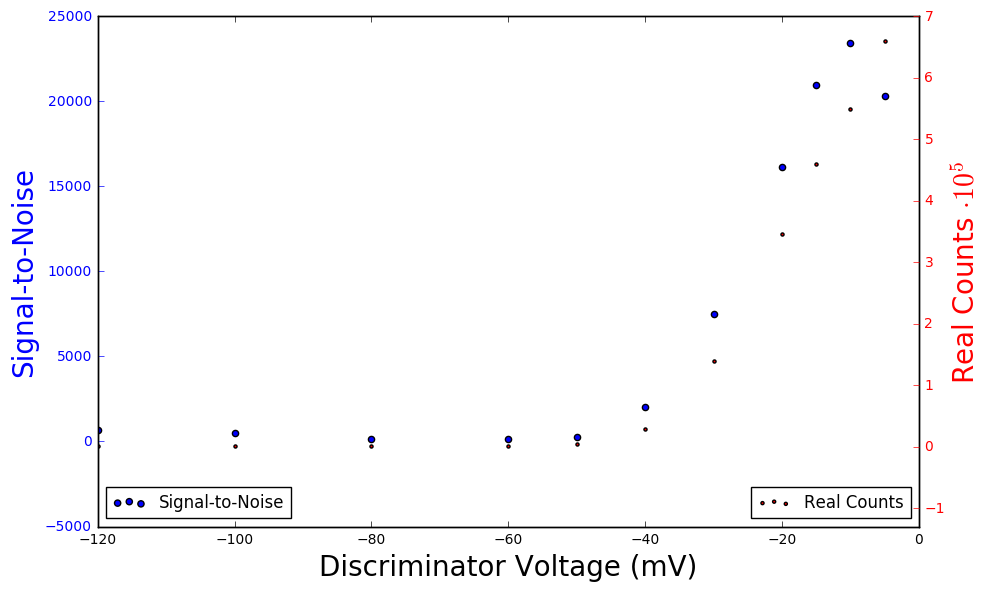

In [48]:
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.scatter(V, S2N,c='b',marker="o",label='Signal-to-Noise')
ax1.set_xlabel('Discriminator Voltage (mV)',size=20)
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Signal-to-Noise', color='b',size=20)
ax1.tick_params('y', colors='b')
plt.legend(loc='lower left')
plt.xlim(-120,0)

ax2 = ax1.twinx()
ax2.scatter(V, RealCounts*1e-5,c='r',marker=".",label='Real Counts')
ax2.set_ylabel('Real Counts $\cdot 10^{5}$', color='r',size=20)
ax2.tick_params('y', colors='r')
plt.xlim(-120,0)
plt.ylim(-1.3,7)


fig.tight_layout()
plt.savefig('Discriminator.png')
plt.legend(loc='lower right')
plt.show()

# Pulse Observation

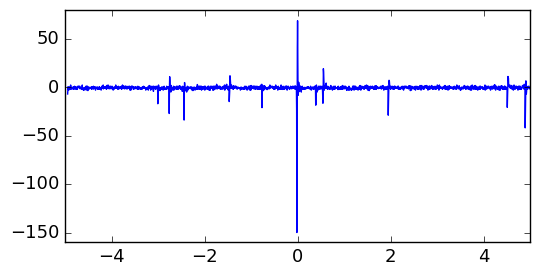

In [49]:
Const_I_1 = pd.read_excel('const_i_1.csv',skiprows=[0]);

Time1 = Const_I_1['second']
Volt1 = Const_I_1['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time1*1e6,Volt1*1e3)
plt.ylim(-160,80)
plt.xlim(-5,5);

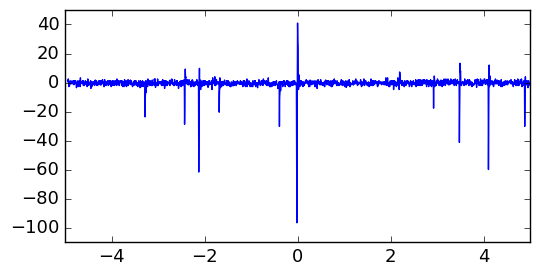

In [50]:
Const_I_2 = pd.read_excel('const_i_2.csv',skiprows=[0]);

Time2 = Const_I_2['second']
Volt2 = Const_I_2['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time2*1e6,Volt2*1e3)
plt.ylim(-110,50)
plt.xlim(-5,5);

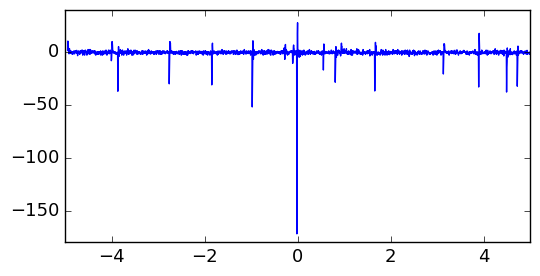

In [51]:
Const_I_3 = pd.read_excel('const_i_3.csv',skiprows=[0]);

Time3 = Const_I_3['second']
Volt3 = Const_I_3['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time3*1e6,Volt3*1e3)
plt.ylim(-180,40);
plt.xlim(-5,5);

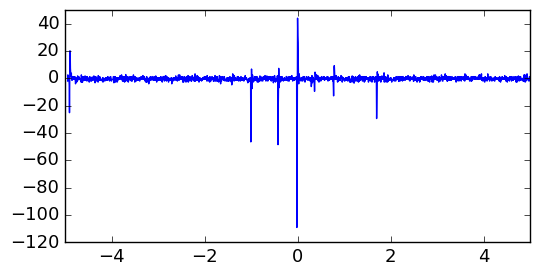

In [52]:
Const_I_4 = pd.read_excel('const_i_4.csv',skiprows=[0]);

Time4 = Const_I_4['second']
Volt4 = Const_I_4['Volt']

plt.figure(figsize=(6,3))
plt.xticks(size = 13);
plt.yticks(size = 13);
plt.plot(Time4*1e6,Volt4*1e3)
plt.ylim(-120,50)
plt.xlim(-5,5);

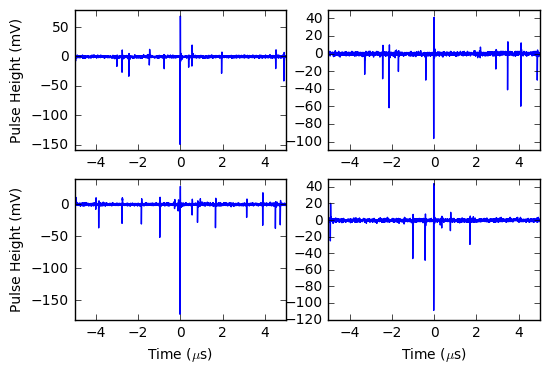

In [53]:
f, axarr = plt.subplots(2, 2);
axarr[0, 0].plot(Time1*1e6,Volt1*1e3);
#axarr[0, 0].set_xlabel('Time ($\mu$s)');
axarr[0, 0].set_ylabel('Pulse Height (mV)');
axarr[0, 0].set_xlim(-5,5);
axarr[0, 0].set_ylim(-160,80);

axarr[0, 1].plot(Time2*1e6,Volt2*1e3);
#axarr[0, 1].set_xlabel('Time ($\mu$s)');
#axarr[0, 1].set_ylabel('Pulse Height (mV)');
axarr[0, 1].set_xlim(-5,5);
axarr[0, 1].set_ylim(-110,50);

axarr[1, 0].plot(Time3*1e6,Volt3*1e3);
axarr[1, 0].set_xlabel('Time ($\mu$s)');
axarr[1, 0].set_ylabel('Pulse Height (mV)');
axarr[1, 0].set_xlim(-5,5);
axarr[1, 0].set_ylim(-180,40);

axarr[1, 1].plot(Time4*1e6,Volt4*1e3);
axarr[1, 1].set_xlabel('Time ($\mu$s)');
#axarr[1, 1].set_ylabel('Pulse Height (mV)');
axarr[1, 1].set_xlim(-5,5);
axarr[1, 1].set_ylim(-120,50);
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
fig.tight_layout()
#plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False);
#plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False);
plt.savefig('Pulses.png')